<a href="https://colab.research.google.com/github/smitapatil1/Association-Rule/blob/main/Association_Rule_assignment_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install mlxtend

In [4]:
book=pd.read_csv("/content/book.csv")
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


Data preprocessing not required as it is already in transaction format

**Apriori Algorith**

1) Association rules with 10% Support and 70% confidence

In [5]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [6]:
# With 10% Support
frequent_itemsets=apriori(book,min_support=0.1,use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [7]:
# with 70% confidence
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961


In [8]:
rules.sort_values('lift',ascending=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
86,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


In [9]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
96,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
97,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


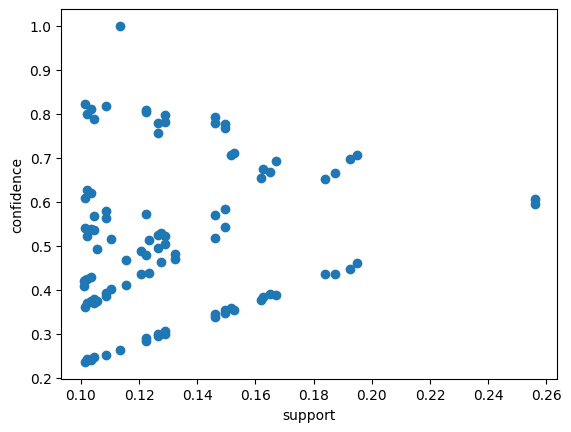

In [10]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

## **2)Association rules with 20% Support and 60% confidence**

In [11]:
# With 20% Support
frequent_itemsets2=apriori(book,min_support=0.20,use_colnames=True)
frequent_itemsets2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [12]:
# With 60% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.6)
rules2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


In [13]:
rules2[rules2.lift>1]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


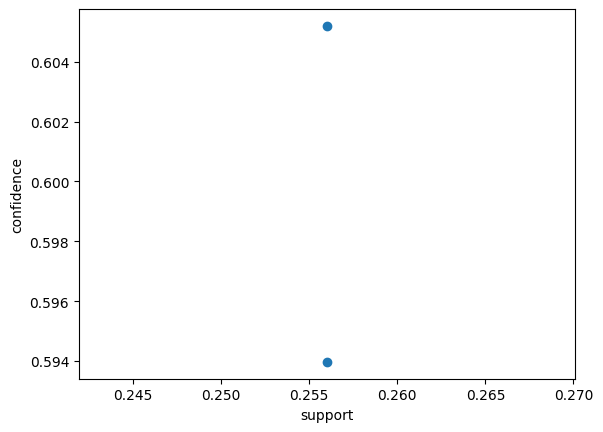

In [14]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

**3) Association rules with 5% Support and 80% confidence**

In [15]:
# With 5% Support
frequent_itemsets3=apriori(book,min_support=0.05,use_colnames=True)
frequent_itemsets3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(CookBks, GeogBks, DoItYBks, YouthBks)"
96,0.0560,"(CookBks, ArtBks, GeogBks, YouthBks)"
97,0.0650,"(CookBks, ArtBks, GeogBks, DoItYBks)"
98,0.0510,"(ChildBks, YouthBks, CookBks, DoItYBks, GeogBks)"


In [16]:
# With 80% confidence
rules3=association_rules(frequent_itemsets3,metric='lift',min_threshold=0.8)
rules3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
657,(ChildBks),"(CookBks, ArtBks, GeogBks, DoItYBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379,0.842417
658,(CookBks),"(GeogBks, ChildBks, ArtBks, DoItYBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789,0.915050
659,(ArtBks),"(CookBks, ChildBks, GeogBks, DoItYBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,0.789307
660,(DoItYBks),"(CookBks, ChildBks, ArtBks, GeogBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085,0.779762


In [17]:
rules3[rules3.lift>1]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
657,(ChildBks),"(CookBks, ArtBks, GeogBks, DoItYBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379,0.842417
658,(CookBks),"(GeogBks, ChildBks, ArtBks, DoItYBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789,0.915050
659,(ArtBks),"(CookBks, ChildBks, GeogBks, DoItYBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,0.789307
660,(DoItYBks),"(CookBks, ChildBks, ArtBks, GeogBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085,0.779762


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


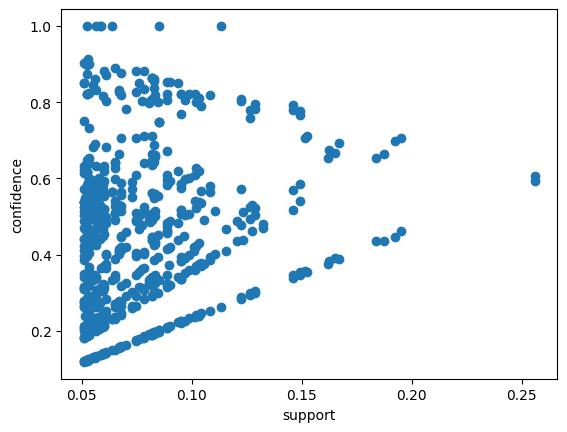

In [18]:
# visualization of obtained rule
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()